# Exercise 04.1 - Neural Networks for Regression

Before you can start, you have to find a GPU on the system that is not heavily used by other users. Otherwise you cannot initialize your neural network.


**Hint:** the command is **nvidia-smi**, just in case it is displayed above in two lines because of a line break.

As a result you get a summary of the GPUs available in the system, their current memory usage (in MiB for megabytes), and their current utilization (in %). There should be six or eight GPUs listed and these are numbered 0 to n-1 (n being the number of GPUs). The GPU numbers (ids) are quite at the beginning of each GPU section and their numbers increase from top to bottom by 1.

Find a GPU where the memory usage is low. For this purpose look at the memory usage, which looks something like '365MiB / 16125MiB'. The first value is the already used up memory and the second value is the total memory of the GPU. Look for a GPU where there is a large difference between the first and the second value.

**Remember the GPU id and write it in the next line instead of the character X.**

In [4]:
# Change X to the GPU number you want to use,
# otherwise you will get a Python error
# e.g. USE_GPU = 4
USE_GPU = 0 # YOUR CHOICE

In [2]:
!nvidia-smi

'nvidia-smi' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


### Choose one GPU

**The following code is very important and must always be executed before using TensorFlow in the exercises, so that only one GPU is used and that it is set in a way that not all its memory is used at once. Otherwise, the other students will not be able to work with this GPU.**

The following program code imports the TensorFlow library for Deep Learning and outputs the version of the library.

Then, TensorFlow is configured to only see the one GPU whose number you wrote in the above cell (USE_GPU = X) instead of the X.

Finally, the GPU is set so that it does not immediately reserve all memory, but only uses more memory when needed. 

(The comments within the code cell explains a bit of what is happening if you are interested to better understand it. See also the documentation of TensorFlow for an explanation of the used methods.)

In [6]:
# Import TensorFlow 
import tensorflow as tf

# Print the installed TensorFlow version
print(f'TensorFlow version: {tf.__version__}\n')

# Get all GPU devices on this server
gpu_devices = tf.config.list_physical_devices('GPU')

# Print the name and the type of all GPU devices
print('Available GPU Devices:')
for gpu in gpu_devices:
    print(' ', gpu.name, gpu.device_type)
    
# Set only the GPU specified as USE_GPU to be visible
#tf.config.set_visible_devices(gpu_devices[USE_GPU], 'GPU')

# Get all visible GPU  devices on this server
visible_devices = tf.config.get_visible_devices('GPU')

# Print the name and the type of all visible GPU devices
print('\nVisible GPU Devices:')
for gpu in visible_devices:
    print(' ', gpu.name, gpu.device_type)
    
# Set the visible device(s) to not allocate all available memory at once,
# but rather let the memory grow whenever needed
for gpu in visible_devices:
    tf.config.experimental.set_memory_growth(gpu, True)

TensorFlow version: 2.4.0

Available GPU Devices:

Visible GPU Devices:


## Part II - Regression with Keras

The main task perform is to build a model of housing prices in California using the California census data.
Our model should learn from this data and be able to predict the median housing price in any district, given all the other attributes.

* This task a typical **supervised learning task** since we are given **labeled training examples** (each instance comes with the expected
output, i.e., the district’s median housing price).
* The task  also a typical **regression task**, since we are asked to predict a **continuous real value**.
* More specifically, this is a **multiple regression problem** since the system will use **multiple features** to make a prediction (it
will use the district’s population, the median income, etc.).
* It is also a **univariate regression** problem since we are only trying to **predict a single value** for each district.

## Learning Objectives

* learn how to configure a neural network architecture to solve a regression task, and in particular:
* learn to define the output layer for regression task
* learn to define activation function for regression;
* understand the cost functions and metrics for regression
+ understand and practice weights and biases initialization in keras
+ understand and practice with Batch Normalization Layers
+ learn how to take advantage of the logs dictionary in Keras
+ learn to define our own callbacks and check the progress of a model.
+ understand and practice EarlyStoping 

### Weight and bias initialisers 



#### Default weights and biases

In the models we have worked with so far, we have not specified the initial values of the weights and biases in each layer of our neural networks.

The default values of the weights and biases in TensorFlow depend on the type of layers we are using. 

For example, in a `Dense` layer, the biases are set to zero (`zeros`) by default, while the weights are set according to `glorot_uniform`, the Glorot uniform initialiser. 

The Glorot uniform initialiser draws the weights uniformly at random from the closed interval $[-c,c]$, where $$c = \sqrt{\frac{6}{n_{input}+n_{output}}}$$

### Initialising your own weights and biases
We often would like to initialise our own weights and biases, and TensorFlow makes this process quite straightforward.

When we construct a model in TensorFlow, each layer has optional arguments `kernel_initialiser` and `bias_initialiser`, which are used to set the weights and biases respectively.

If a layer has no weights or biases (e.g. it is a max pooling layer), then trying to set either `kernel_initialiser` or `bias_initialiser` will throw an error.

The various initializations available in Keras can be found [here](https://www.tensorflow.org/api_docs/python/tf/keras/initializers).
Below is an example with showing custom layer weights initialization:
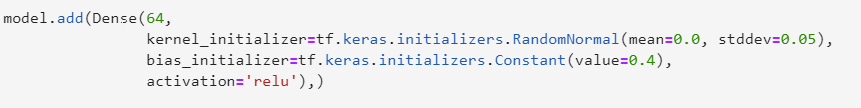

### Batch normalisation layers

We can implement batch normalisation into our model by adding it in the same way as any other layer.

Recall that there are some parameters and hyperparameters associated with batch normalisation.

* The hyperparameter **momentum** is the weighting given to the previous running mean when re-computing it with an extra minibatch. By **default**, it is set to 0.99.

* The hyperparameter **$\epsilon$** is used for numeric stability when performing the normalisation over the minibatch. By **default** it is set to 0.001.

* The parameters **$\beta$** and **$\gamma$** are used to implement an affine transformation after normalisation. By **default**, $\beta$ is an all-zeros vector, and $\gamma$ is an all-ones vector.

#### Customising parameters
These can all be changed (along with various other properties) by adding optional arguments to `tf.keras.layers.BatchNormalization()`.

We can also specify the axis for batch normalisation. By default, it is set as -1.

Below you can see two examples. </br>
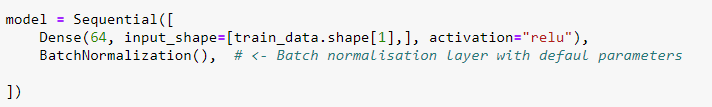

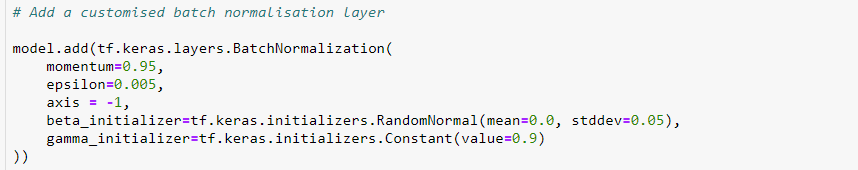

## Using callbacks to act on a model during training

When training a model we cannot predict from a-priori  *how many epochs*  will be needed to get to an *optimal
validation loss*. </br>
One empirical method is to train a model for a fixed number of epochs, in general large enough that it would start overfitting, and using this first run to figure out the proper number of epochs to train for, then finally launch a new training run from scratch
using this optimal number. </br>

A much better way to handle this would be stop training when we measure that the validation loss has stopped improving. This can be achieved using a tf.Keras `callback` object. </br>

**A callback** is an object (a class instance implementing specific methods) that is passed to the `model` in the call to `fit` and that is called by the model at various points during training. It has access to all the data available about the state of the model and its performance, and it is capable to take action, for instance interrupting training, saving a model, loading a different weight set, or otherwise altering the state of the model.  </br>

**Callbacks can be used for:**
* Model checkpointing: saving the current weights of the model at different points during training.
* Early stopping: interrupting training when the validation loss has stopped improving (and of course, saving the best model obtained during training).
* Dynamically adjusting the value of certain parameters during training, such as the learning rate of the optimizer.
* Logging the training and validation metrics during training, or visualizing the representations learned by the model as they get updated. 

* And more…
There are a number of built-in callbacks found in the `tf.keras.callbacks` [module](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks)

### Early Stopping Callback
Early Stopping Callback can be used to interrupt the training process once a target metric being monitored has stopped improving for  a fixed number of epochs. For example, in the cell bellow, the validation _loss is monitored. Once the difference between two successive values is less than a specified value (min_delta) for  a number of epochs (patience), the training is stopped.

In [25]:
# This callback will monitor the validation loss
# will interrupt training when the diff between succesive val of valid loss is under the threshold

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', min_delta = .0001, patience = 8)
]
 # now you can use the list (here contaioning only One callback object, but you can define more than one) and pass  it to the argument callbacks in the fit method

#### Dataset
In this tutorial we will use the `California Housing Prices dataset` introduced in teh first notebook of the tutorial.


The dataset comes in tabular form, comprizing more than 20600 records with 8 columns that represent attributes (features) such as the population, median income, median housing price, and so on for each *block group* in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). Here they will be called “districts”  for the sake of brevity.
for short.
[ California Housing dataset¶](https://scikit-learn.org/stable/datasets/index.html)


- MedInc median income in block

+ HouseAge median house age in block

+ AveRooms average number of rooms

+ AveBedrms average number of bedrooms

+ Population block population

+ AveOccup average house occupancy

+ Latitude house block latitude

+ Longitude house block longitude

This dataset was obtained from the StatLib repository. http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

It can be downloaded/loaded using the sklearn.datasets.fetch_california_housing function.

In [7]:
import sys
import sklearn
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [8]:
 if not os.path.exists('./datasets'): # creating a path for dataset if not existing
    os.mkdir('./datasets')

We start loading the dataset using the built-in [datasets module from sklearn](https://scikit-learn.org/stable/datasets/index.html) using the `fetch_california_housing` function.

In [9]:
from sklearn.datasets import fetch_california_housing

In [10]:
X_full, y_full = fetch_california_housing(data_home = r'./datasets', return_X_y=True) 

In [11]:
# the dataset is loaded in two numpy arrays for data and target; Let us check this::
print(type(X_full))
print(X_full.shape)
print(type(y_full))
print(y_full.shape)

<class 'numpy.ndarray'>
(20640, 8)
<class 'numpy.ndarray'>
(20640,)


### Create a Validation and Tests Set

Evaluating a model always boils down to splitting your available data into three sets:
training, validation, and test set. You train on the training data, and evaluate your model on the validation data. Once your model is ready for prime time, you test it one final time
on the test data The reason is that developing a model always involves tuning its configuration, e.g. picking the number of layers or the size of the layers (what is called the
"hyperparameters" of the model, to distinguish them from the "parameters", which are the network’s weights). You will do this tuning by using as feedback signal the
performance of the model on the validation data, so in essence this tuning is a form of learning: a search for a good configuration in some parameter space. As a result, tuning
the configuration of the model based on its performance on the validation set can quickly result in overfitting to the validation set, even though your model is never being directly
trained on it.
Central to this phenomenon is the notion of "information leak". Every time you are tuning a hyperparameter of your model based on the model’s performance on the
validation set, some information about the validation data is leaking into your model. If you only do this once, for one parameter, then very few bits of information would be
leaking and your validation set would remain a reliable way to evaluate your model. But if you repeat this many times, running one experiment, evaluating on the validation set,
modifying your model as a result, then you are leaking an increasingly significant amount of information about the validation set into your model.
At the end of the day, you end up with a model that performs artificially well on the
validation data, because it is what you optimized it for. Splitting your data into a training, validation, and test sets may seem straightforward,
but there are a few advanced ways to do it which can come in handy when very few data is available. </br>

Scikit-Learn provides a several functions to split datasets into multiple subsets in various ways. The simplest function is [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test%20split#sklearn.model_selection.train_test_split). </br>
It has a key -value argument `random_state parameter` that allows you to set the random generator seed (which allows us to reproduce the results).

In [12]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)
print(f'The test dataset comprises {X_test.shape[0]} examples.')

The test dataset comprises 4128 examples.


Furthermore, we split the trainig dataset in training and validation sets; As usual, we will use the validation set to follow the progress of the training on examples not seen during the training which will help us to tune the training hyperparameters.

In [13]:
X_train, X_valid, y_train, y_valid  = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)
print(f'The training set comprises {X_train.shape[0]} examples.')
print(f'The validation set comprises {X_valid.shape[0]} examples.')

The training set comprises 14860 examples.
The validation set comprises 1652 examples.


## Feature Scaling

One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the housing data: the average number of rooms ranges from about 0.84 to 141, while the median incomes only range from 0 to 15. Note that *scaling the target values is generally not required.*
There are two common ways to get all attributes to have the same scale: `min-max scaling` and `standardization`.  </br>
+ Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1.
+ Standardization requires that you know or are able to accurately estimate the mean and standard deviation of observable values. You may be able to estimate these values from your training data, not the entire dataset.
Subtracting the mean from the data is called centering, whereas dividing by the standard deviation is called scaling. As such, the method is sometime called “center scaling“.
Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers.

 In order to standardise our data we will use the [built-in functionality of sklearn](
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)


### Important Observation

As with all the transformations, it is important to **fit the scalers to the training data only!!!**, not to the full dataset (including the test set).
Only then can you use them to transform the training set and the test set (and new data).

In [14]:
from sklearn.preprocessing import StandardScaler # importing StandardScaler class

In [15]:
std_scaler = StandardScaler() # creating a new StandardScaler instance

In [16]:
X_train_scaled = std_scaler.fit_transform(X_train)  # fitting and transforming the data
X_valid_scaled = std_scaler.transform(X_valid)
X_test_scaled = std_scaler.transform(X_test)

In [17]:
print(f'train means:  {std_scaler.mean_}')   # accesing the mean attribute

train means:  [ 3.87371384e+00  2.85697174e+01  5.43057079e+00  1.09678339e+00
  1.42999408e+03  3.11775611e+00  3.56406198e+01 -1.19578168e+02]


In [18]:
print(f'train standard deviations:  {std_scaler.var_}') 

train standard deviations:  [3.59053637e+00 1.58438545e+02 5.68032226e+00 1.86297516e-01
 1.29547148e+06 1.48880883e+02 4.55117472e+00 4.00645847e+00]


In [19]:
print(f'applied scaling values (mean/std):  {std_scaler.scale_}') 

applied scaling values (mean/std):  [1.89487107e+00 1.25872374e+01 2.38334267e+00 4.31621960e-01
 1.13818781e+03 1.22016754e+01 2.13334824e+00 2.00161397e+00]


### ANN model for Regression
    
Building, training, evaluating and using a regression MLP using the Sequential API to make predictions is quite similar to what we did for classification. </br>
In contrast to the classification task, where the output is a set of probabilities corresponding to each categories of a pre-defined set, the output of regression is a continuous, real number. Consequently,

+ **the output layer has a single neuron** (since we only want to predict a single value) and uses no activation function



Because the dataset is quite noisy and of reduced size, we will just use a single hidden layer with fewer neurons than before, to avoid overfitting:

In [20]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, ReLU

In [21]:
input_shape = X_train_scaled.shape[1:]

In [22]:
model = Sequential([
    Dense(32, activation="relu", input_shape=input_shape),
    Dense(1)
])

Another important difference is the used loss function to train the network (which are, in general, the same with the metrics. Because when computing the cost, we compare two real numbers, the typical [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses) for regression are: 
 * mean of absolute error / MAE
 * the mean of squares of errors / MSE
 * [huber](https://en.wikipedia.org/wiki/Huber_loss), etc.



In [23]:
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(lr=1e-2))

In [26]:
history = model.fit(X_train_scaled, y_train, epochs=25,
                    validation_data=(X_valid_scaled, y_valid),
                     verbose =1, callbacks = callbacks_list)

Epoch 1/25
465/465 [==============================] - 1s 846us/step - loss: 1.0482 - val_loss: 0.9251
Epoch 2/25
465/465 [==============================] - 0s 513us/step - loss: 0.5265 - val_loss: 0.5176
Epoch 3/25
465/465 [==============================] - 0s 529us/step - loss: 0.4609 - val_loss: 0.4832
Epoch 4/25
465/465 [==============================] - 0s 507us/step - loss: 0.4392 - val_loss: 0.4827
Epoch 5/25
465/465 [==============================] - 0s 500us/step - loss: 0.4180 - val_loss: 0.4583
Epoch 6/25
465/465 [==============================] - 0s 502us/step - loss: 0.4310 - val_loss: 0.4560
Epoch 7/25
465/465 [==============================] - 0s 500us/step - loss: 0.4114 - val_loss: 0.4502
Epoch 8/25
465/465 [==============================] - 0s 511us/step - loss: 0.4113 - val_loss: 0.4429
Epoch 9/25
465/465 [==============================] - 0s 502us/step - loss: 0.4084 - val_loss: 0.4437
Epoch 10/25
465/465 [==============================] - 0s 507us/step - loss: 0.394

##### Unpacking the training history - the logs dictionary 
The call to `model.fit_generator()` returns a `History` object. This object has a member `history`, which is a dictionary containing the values of the loss and chosen metrics on the training and validation set during each training epoch:

Since the 'history' attribute is a python dictionary, you can retrive the keys using the `.keys()` method.The `logs` dictionary

The `logs` dictionary stores the loss value, along with all of the metrics we are using at the end of a batch or epoch.

In [27]:
def plot_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(loss, label='loss')
    plt.plot(val_loss, label='val_loss')
    plt.ylim([0.2, 1.6])
    plt.xlabel('Epoch')
    plt.ylabel('Loss ')
    plt.legend()
    plt.grid(True)
    plt.show()

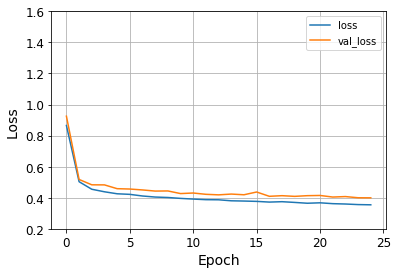

In [28]:
plot_loss(history)

In [29]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test_scaled
y_pred = model.predict(X_new)

129/129 [==============================] - 0s 602us/step - loss: 26268.6934


In [30]:
y_pred

array([[0.4698076],
       [1.4430513],
       [3.7227893],
       ...,
       [4.530476 ],
       [0.7864435],
       [1.6730946]], dtype=float32)

In [31]:
y_test[:2]

array([0.477, 0.458])

In [32]:
def plot_diff(y_true, y_pred, title = ''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis = ('equal')
    plt.axis = ('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-500, 500], [-500, 500])

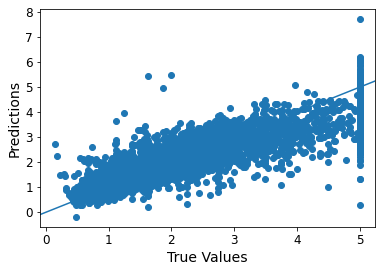

In [33]:
plot_diff(y_test, y_pred)

### Task 1

Define a callback that stops the training when the validation loss stops decreasing and store it in a variable called `callbacks_list`. </br>
**Hints:**
- Instantiate a `tf.keras.callbacks.EarlyStopping()` object and pass in appropriate values for the following arguments:
 + `monitor = `  - HINT:  In 'min' mode, training will stop when the quantity monitored has stopped decreasing; (see the link to Documentation)
 + `mode = ` 
 + `patience = `

</br>

[Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

In [35]:
callbacks_list = [
    # your code here
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', patience=8)
]

### TASK 2 - Build the neural network model

You can now construct a model to fit to the data. Using the Sequential API, build your model according to the following specifications:

* The model should use the `input_shape` in the function argument to set the input size in the first layer.
* The first layer should be a `dense` layer:
with 32 units.
* [choose an initializer](https://www.tensorflow.org/api_docs/python/tf/keras/initializers) for the weights the first layer. 
* The biases of the first layer should be all initially equal to one.
* Add a Batch Normalization layer (with default values for the arguments)
* There should then be a further dense layer, each with 64 units.
* Add a Batch Normalization layer (with default values for the arguments)
* All of these Dense layers should use the ELU activation function.
* The output Dense layer should 1 unit and NO activation function.

In total, the network should have 5 layers.

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense,  BatchNormalization

In [48]:
input_shape = X_train_scaled.shape[1:]

# instantiate a Sequential model object

model = Sequential([
    Dense(32, input_shape=input_shape, kernel_initializer='glorot_uniform',
    bias_initializer='ones', activation='elu'),
    BatchNormalization(),
    Dense(64, activation='elu'),
    BatchNormalization()
])

### TASK 3  - Compile your model

You should now compile the model using the `compile` method. Remember that you need to specify an optimizer, a loss function  to judge the performance of your model.

In [56]:
model.compile(optimizer='adam', loss='mse', metrics=["mean_squared_error", "acc"])

### TASK 4 - Fit the model to the training data

Now you should train the model on the Housing  dataset, using the model's `fit` method. 
* Run the training for a fixed number of epochs, given by the function's `epochs` argument.
* Return the training history to be used for plotting the learning curves.
* Set the batch size to 32.
* pass in (X_valid, y_valid) as values for the `validation_data`argument
* pass in the `callbacks_list` you have defined at task 1 to the `callbacks argument`

In [57]:
history = model.fit(x=X_train_scaled, y=y_train, batch_size=32, epochs=15, validation_data=(X_valid_scaled, y_valid), callbacks=callbacks_list)

Epoch 1/5
465/465 [==============================] - 1s 1ms/step - loss: 0.5341 - mean_squared_error: 0.5341 - acc: 2.7722e-04 - val_loss: 0.5000 - val_mean_squared_error: 0.5000 - val_acc: 0.0000e+00
Epoch 2/5
465/465 [==============================] - 0s 936us/step - loss: 0.4514 - mean_squared_error: 0.4514 - acc: 1.1568e-04 - val_loss: 0.4693 - val_mean_squared_error: 0.4693 - val_acc: 0.0000e+00
Epoch 3/5
465/465 [==============================] - 0s 927us/step - loss: 0.4400 - mean_squared_error: 0.4400 - acc: 6.0119e-05 - val_loss: 0.4745 - val_mean_squared_error: 0.4745 - val_acc: 0.0000e+00
Epoch 4/5
465/465 [==============================] - 0s 959us/step - loss: 0.4524 - mean_squared_error: 0.4524 - acc: 3.7361e-04 - val_loss: 0.4561 - val_mean_squared_error: 0.4561 - val_acc: 0.0000e+00
Epoch 5/5
465/465 [==============================] - 0s 951us/step - loss: 0.4370 - mean_squared_error: 0.4370 - acc: 2.5647e-04 - val_loss: 0.4628 - val_mean_squared_error: 0.4628 - val_acc

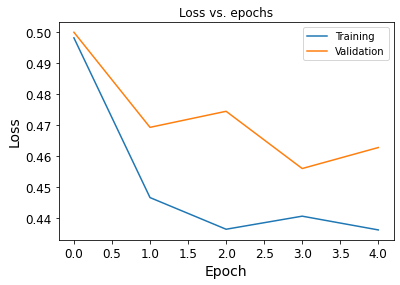

In [59]:
# Finally, let's replot the accuracy and loss graphs for your new model.

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

## Further reading and resources 
* https://keras.io/layers/normalization/
* https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/BatchNormalization
* https://www.tensorflow.org/guide/keras/custom_callback
* https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback

In [ ]:
## please, remember to stop the kernel before leaving the server! :)